# Predict Used Car Value

#### Presented By: Apoorv Goel, Harish Yadav, Nipun Soni

This data set is taken from [Kaggle.com](https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/data). 

The aim of this project is to come up with a model which will be able to predict Value of a used Car based on different parameters available. People going forward to buy used cars will have better decision making in what parameters to look for and how to estimate prices of such cars.

### About Data:
Over 371528 rows, 20 Columns.

dateCrawled : when this ad was first crawled, all field-values are taken from this date <br>
name : "name" of the car<br>
seller : private or dealer<br>
offerType<br>
price : the price on the ad to sell the car<br>
abtest<br>
vehicleType<br>
yearOfRegistration : at which year the car was first registered<br>
gearbox<br>
powerPS : power of the car in PS<br>
model<br>
kilometer : how many kilometers the car has driven<br>
monthOfRegistration : at which month the car was first registered<br>
fuelType<br>
brand<br>
notRepairedDamage : if the car has a damage which is not repaired yet<br>
dateCreated : the date for which the ad at ebay was created<br>
nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless)<br>
postalCode<br>
lastSeenOnline : when the crawler saw this ad last online<br>

### Credits:
Part of this code/insights has been taken from:<br>
https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook <br>
http://scikit-learn.org/stable/ <br>
https://www.udemy.com/




In [124]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [125]:
#Data loading
data = pd.read_csv("autos.csv", sep=',',encoding='latin1') #Default encoding is not 'utf-8', used Notepad++ to identify that
data.head() # Check first 5 rows of dataframe

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [126]:
data.info() # We have 371528  rows, 20 columns in our data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [127]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

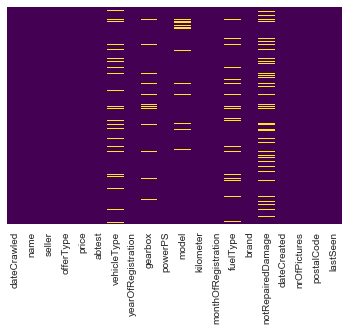

In [128]:
#Check the null values
#This plot marks the null values in dataset with yellow lines
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data.isnull().sum() #Over 184008 of NULL Values

# Data Wrangling

There are lot of columns that have missing values, NAs, NANs and zeros. These all need to be addressed before we can visualize how data look like and build a predictive model.

Below are some of the techniques used to deal with abnormalities in data:

1. Dropping Unnecessary columns
2. Handling Null values 
3. Removing outliers
4. Renaming Categorical values

<U>Dropping Unnecessary columns:</U><br>

**nrOfPictures**: It has only 0 value in all rows.<br>
**dateCrawled**: Its the date when this add was crawled by API, not of importance.<br>
**seller**: It has only 'privat' or 'gewerblich'<br>
**offerType, abtest**: No Insightful info from this column. <br>
**postalCode**: Until location info is specified, its of no importance.<br>
**dateCreated**, lastSeen: These are the dates as seen by Crawler. <br>
**model**: values similar type of column as brand which is better column.<br>

In [129]:
print('nrOfPictures: ',data.nrOfPictures.unique())
print('seller:       ',data.seller.unique())
print('offerType:    ',data.offerType.unique())
print('abtest:       ',data.abtest.unique())

nrOfPictures:  [0]
seller:        ['privat' 'gewerblich']
offerType:     ['Angebot' 'Gesuch']
abtest:        ['test' 'control']


In [130]:
#Dropping Unnecessary Columns
df_auto_data=data.drop(['nrOfPictures','dateCrawled','seller','offerType','abtest','postalCode','dateCreated',
                    'lastSeen','model'], axis =1)
df_auto_data.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein


(0, 20000)

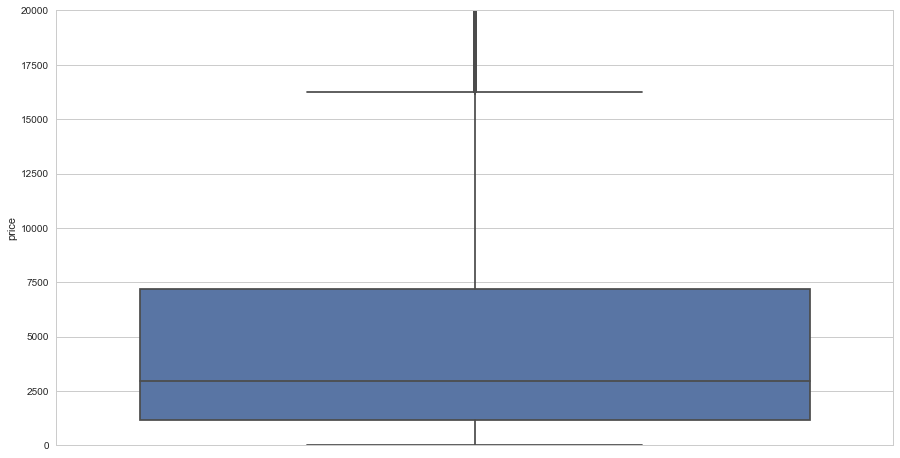

In [131]:
# Checking the Price Distribution
plt.figure(figsize=(15,8))
sns.boxplot(df_auto_data['price'],orient = 'v')
plt.ylim(0,20000)

In [132]:
#filtering price greater than 200 and less than 15000 
df_auto_data = df_auto_data[df_auto_data.price != 0]
df_auto_data = df_auto_data[(df_auto_data.price >= 200) & (df_auto_data.price <= 15000)]

In [133]:
#dropping price outliers for 150000 kilometer records
df_auto_data.drop(df_auto_data[(df_auto_data.price > 11500) & (df_auto_data.kilometer == 150000)].index, inplace=True)

In [134]:
# Making relevant Changes in Data
df_auto_data = df_auto_data[(df_auto_data.yearOfRegistration >= 1950) &
                    (df_auto_data.yearOfRegistration < 2017)]     #Ignoring yearOfRegistration beyond 2017
df_auto_data = df_auto_data[(df_auto_data.powerPS >= 10) & (df_auto_data.powerPS < 700)] 
df_auto_data = df_auto_data[(df_auto_data.monthOfRegistration != 0)]

In [135]:
# Renaming Values in gearbox and notRepairedDamage columns
df_auto_data.gearbox = df_auto_data.gearbox.apply(lambda x: 'manual' if x == 'manuell' else x)
df_auto_data.gearbox = df_auto_data.gearbox.apply(lambda x: 'automatic' if x == 'automatik' else x)
df_auto_data.notRepairedDamage = df_auto_data.notRepairedDamage.apply(lambda x: 'No' if x == 'nein' else x)
df_auto_data.notRepairedDamage = df_auto_data.notRepairedDamage.apply(lambda x: 'Yes' if x == 'ja' else x)

In [136]:
# There are lot of NAN values in the data that are not shown by isnull() function.
df_auto_data = df_auto_data[pd.notnull(df_auto_data['gearbox'])]
df_auto_data = df_auto_data[pd.notnull(df_auto_data['vehicleType'])]
df_auto_data = df_auto_data[pd.notnull(df_auto_data['fuelType'])]
df_auto_data = df_auto_data[pd.notnull(df_auto_data['brand'])]
df_auto_data = df_auto_data[pd.notnull(df_auto_data['notRepairedDamage'])]

In [137]:
df_auto_data.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [138]:
df_auto_data.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manual,75,150000,6,benzin,volkswagen,No
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manual,69,90000,7,diesel,skoda,No
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,150000,10,benzin,bmw,Yes
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manual,109,150000,8,benzin,peugeot,No
10,Mazda_3_1.6_Sport,2000,limousine,2004,manual,105,150000,12,benzin,mazda,No


# Data Visualization

### Count Plots

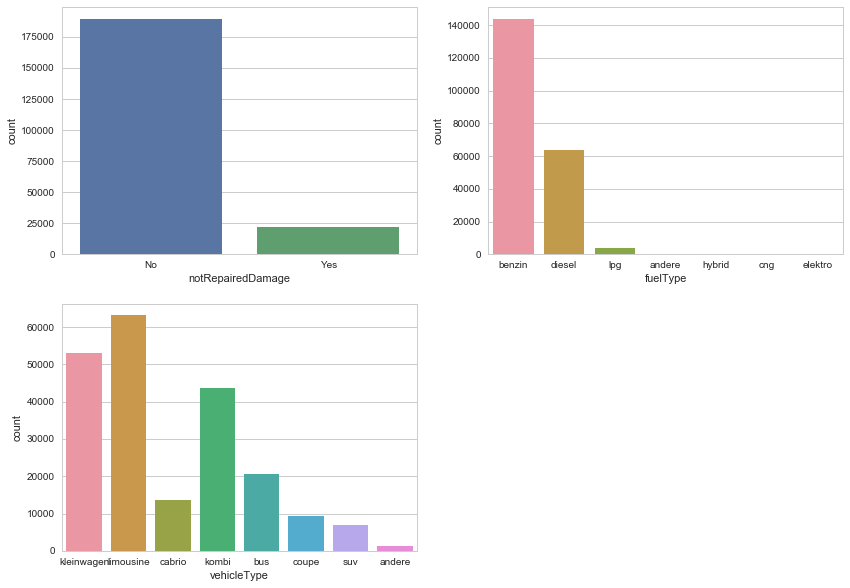

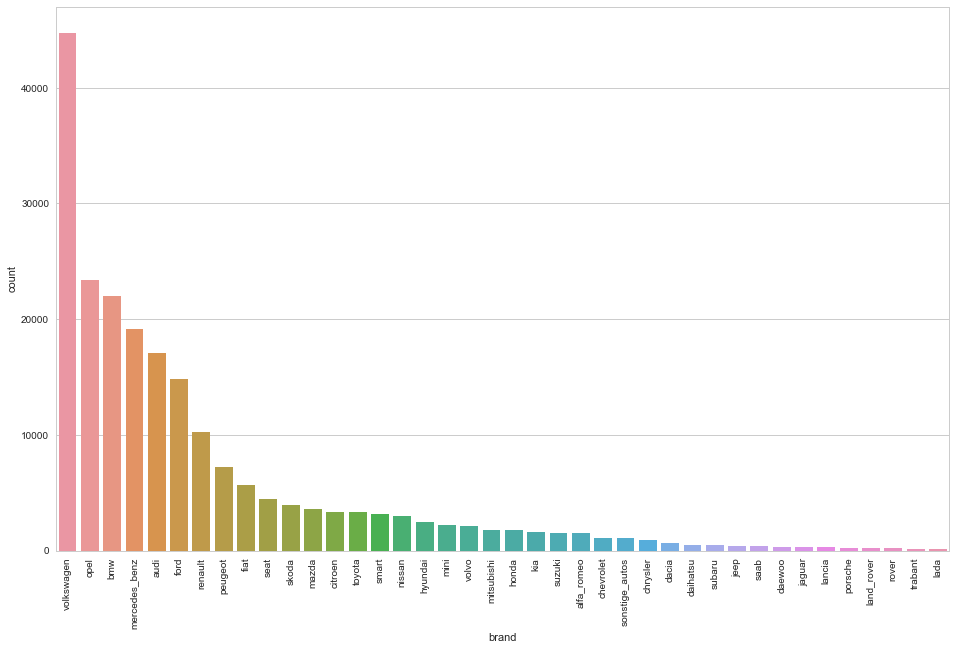

In [139]:
# Data Visualization (Plotting the count plot for different variables)
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(df_auto_data['notRepairedDamage'])
plt.subplot(2,2,2)
sns.countplot(df_auto_data['fuelType'])
plt.subplot(2,2,3)
sns.countplot(df_auto_data['vehicleType'])
plt.show()
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(df_auto_data['brand'], order = df_auto_data['brand'].value_counts().index)

####  The most popular brands are Volkswagen, BMW, Opel, Mercedes, Audi, Ford, Renault, Peugeot, Fiat and Seat
####  Limousine, kombi and kleinwagen are the most popular vehicle types in the second-hand market
####  Though the most of the market is ruled by the petrol/diesel cars but hybrid and other types of fuel cars are emerging slowly

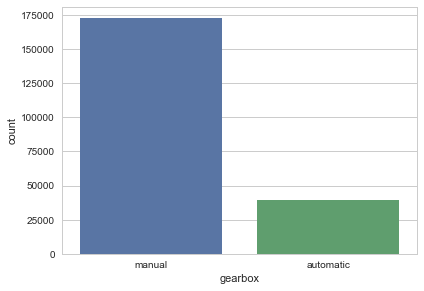

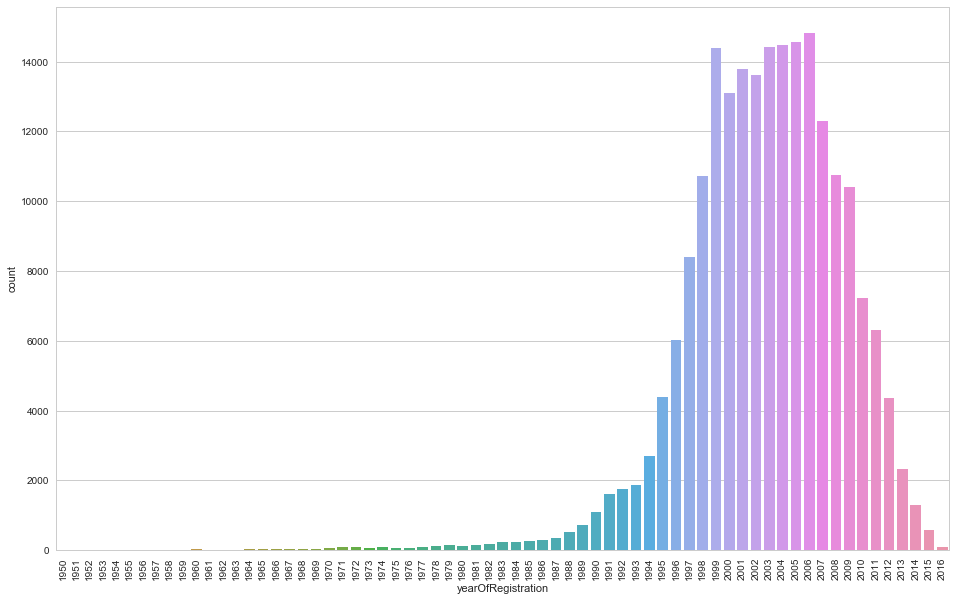

In [140]:
#Count plot for yearOfRegistration
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(df_auto_data['gearbox'])
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(df_auto_data['yearOfRegistration'])

#### The number of manual cars are more and prefer by customers as more number of registration is between 2000 to 2007 when the prices of automatic cars was high.

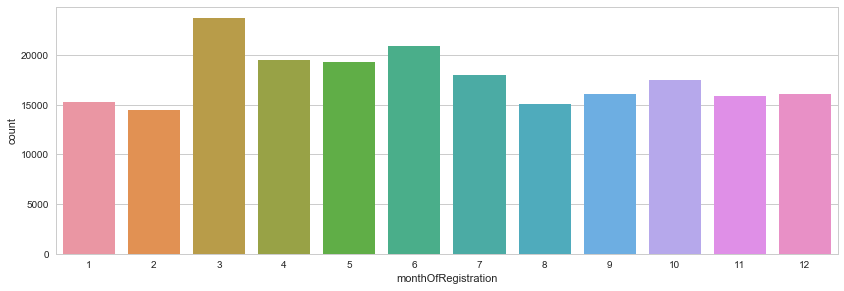

In [141]:
#Count plot for monthOfRegistration
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.countplot(df_auto_data['monthOfRegistration'])

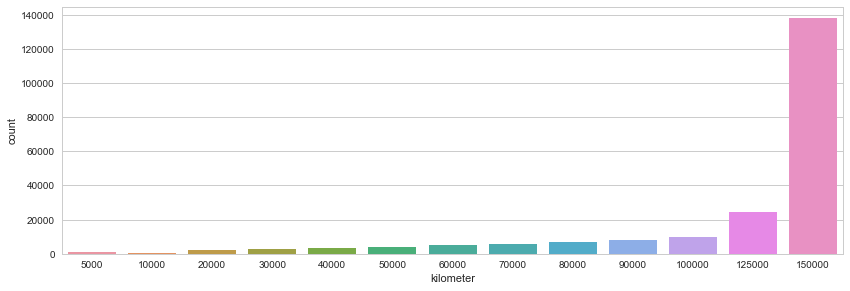

In [142]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.countplot(df_auto_data['kilometer'])

#### Most of the cars in the second-hand market are above 100000 km, even 150000 km. People does not frequently change cars according to our data set

### Violin Plots

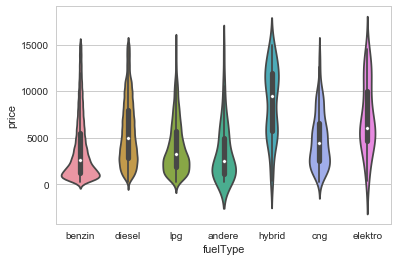

In [143]:
# Violin Plots for independent/predictor: fuelType,notRepairedDamege,gearbox and dependent variable i.e. price
sns.set_style('whitegrid')
sns.violinplot(x='fuelType', y='price', data=df_auto_data)

#### Though the price for hybrid and elektro are higher than benzin and diesel but there is high variance in the price.

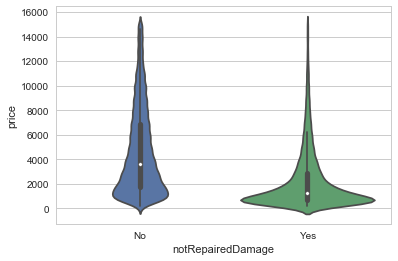

In [144]:
#Distribution of price as per notRepairedDamage
sns.set_style('whitegrid')
sns.violinplot(x='notRepairedDamage', y='price', data=df_auto_data)

#### Cars beyond repaireddamage have low price.

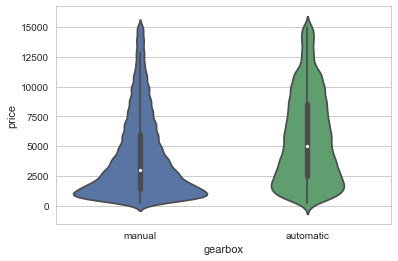

In [145]:
#Distribution of price as per gearbox
sns.set_style('whitegrid')
sns.violinplot(x='gearbox', y='price', data=df_auto_data)

#### Manual cars are less expensive than Automatic cars

### Box Plots

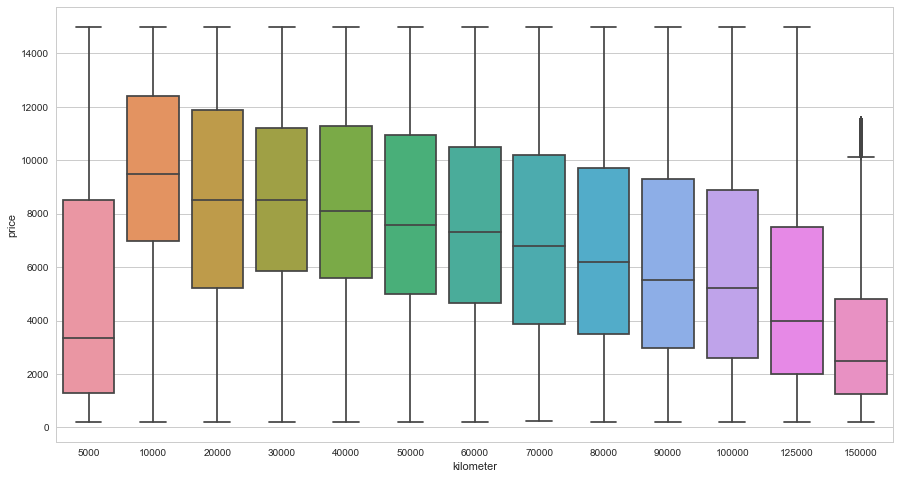

In [146]:
# Box Plot for independent/predictor: kilometer and dependent variable i.e. price
plt.figure(figsize=(15,8))
plt.xlim(0,200000)
sns.boxplot(x = 'kilometer', y = 'price',data= df_auto_data) # Taking a lot of time??????

#### Price decreases with increase in kilometers while we can see that a car with 5000 kms have lower price which can be a result of different unusual factors. 

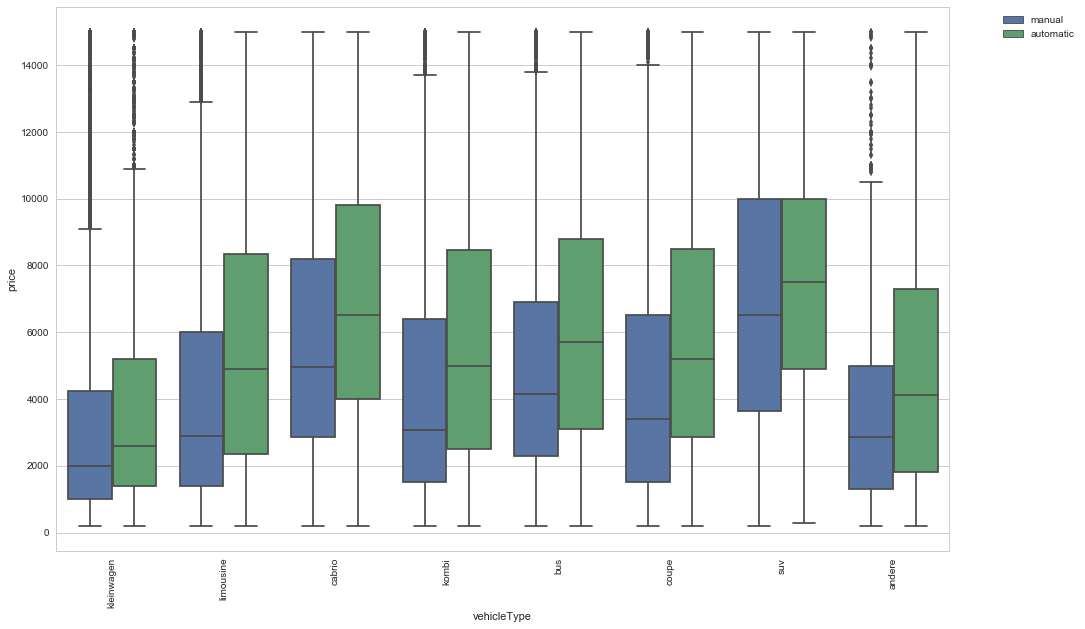

In [147]:
# Box Plot for independent/predictor: vehicle and dependent variable i.e. price
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.boxplot(x='vehicleType', y='price', hue='gearbox', data=df_auto_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Most expensive cars are SUV’s while the cheapest ones are kleinwagens and quite surprisingly Limousine resale value is less than suv


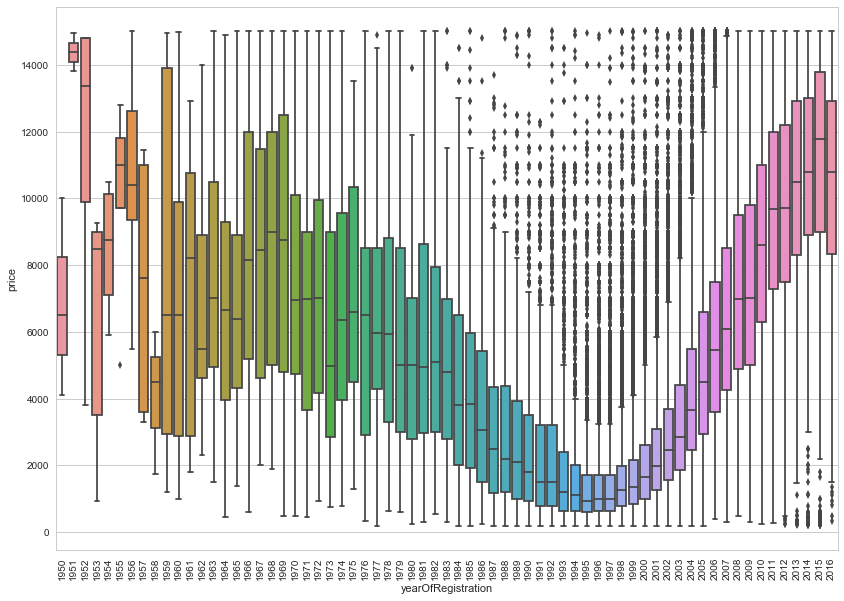

In [148]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.boxplot(x='yearOfRegistration', y='price', data=df_auto_data)

#### The price and year of registration are directly correlated as the year of registration increases the price increases. We can also see that the price also increase with old cars Maybe, 20+ year old second-hand cars can be considered as ‘vintage’

### Regression Plots

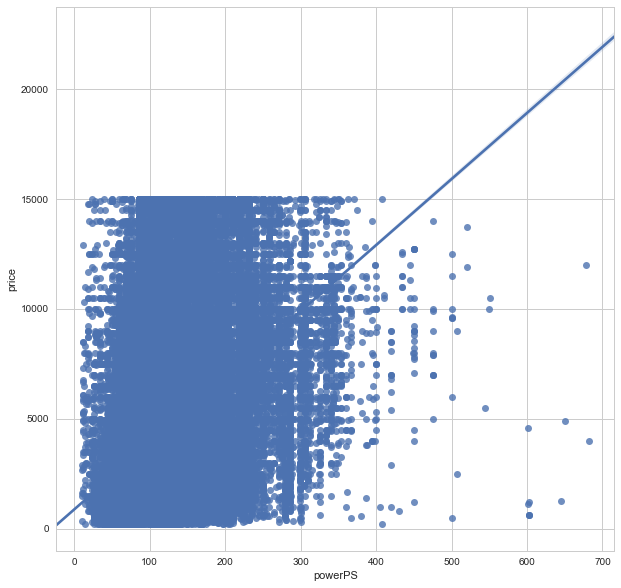

In [149]:
# Scatter Plot with Regression line for independent/predictor: powerPS and dependent variable i.e. price
plt.figure(figsize=(10,10))
sns.regplot(x='powerPS', y='price', data=df_auto_data)

#### Powerps and price are also correlated that is as the power increases, prices increases too

# Data Prepartion

In this section, data is prepared for machine learning. There are couple of data trasformations done on columns:

#### 1. Label Encoding
Most machine learning algorithms work on numerical data. So, we are converting categorical data to numeric values(1, 2, 3...) using Label Encoder from scikit learn package of python.

#### 2. Name column transformations
Since name feature was text, we took the length of each obervation and created a new column 'namelen' to see the significance of the name feature.
This idea taken from https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook

Apart from these transformations, we have used seaborn package to see correlation between features and see distributions of namelen with price.

In [150]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

#convert column categories to numeric using Label Encoder
#Reference: http://pbpython.com/categorical-encoding.html
encoder = LabelEncoder()
df_auto_data["gearbox"] = encoder.fit_transform(df_auto_data["gearbox"])
df_auto_data["vehicleType"] = encoder.fit_transform(df_auto_data["vehicleType"])
df_auto_data["fuelType"] = encoder.fit_transform(df_auto_data["fuelType"])
df_auto_data["brand"] = encoder.fit_transform(df_auto_data["brand"])
df_auto_data["notRepairedDamage"] = encoder.fit_transform(df_auto_data["notRepairedDamage"])

In [151]:
df_auto_data.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,4,2001,1,75,150000,6,1,38,0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,4,2008,1,69,90000,7,3,31,0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,6,1995,1,102,150000,10,1,2,1
6,Peugeot_206_CC_110_Platinum,2200,2,2004,1,109,150000,8,1,25,0
10,Mazda_3_1.6_Sport,2000,6,2004,1,105,150000,12,1,19,0


In [152]:
#Creating a New Feature Column for name length as it might be significant
#Idea taken from https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook
df_auto_data['namelen'] = [min(70, len(n)) for n in df_auto_data['name']]

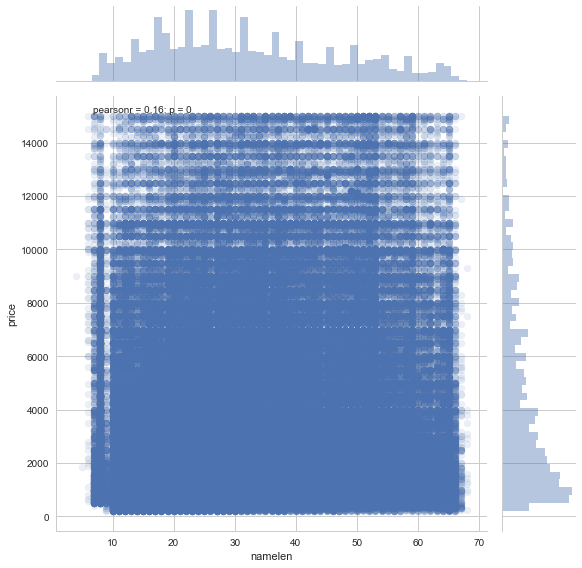

In [153]:
#Checking the namelength distribution with price
sns.jointplot(x='namelen', y='price', data=df_auto_data[['namelen','price']], alpha=0.1, size=8)

It seems price does have a effect in name lengths ranging from 15-25

In [154]:
#Dropping the name column now
df_auto_data.drop('name', axis=1, inplace=True)

In [155]:
df_auto_data.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,namelen
3,1500,4,2001,1,75,150000,6,1,38,0,18
4,3600,4,2008,1,69,90000,7,3,31,0,30
5,650,6,1995,1,102,150000,10,1,2,1,50
6,2200,2,2004,1,109,150000,8,1,25,0,27
10,2000,6,2004,1,105,150000,12,1,19,0,17


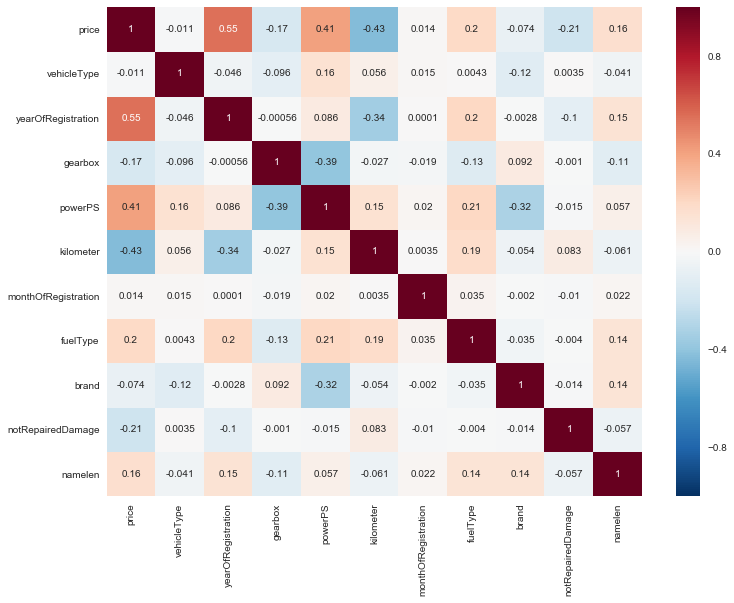

In [156]:
# Making a Correlation HeatMap to identify realtions between different Columns.
plt.subplots(figsize=(12, 9))
sns.heatmap(df_auto_data.corr(), annot = True);

In [157]:
#Identifying the most important columns w.r.t price
#Idea taken from https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook
df_auto_data.corr().loc[:,'price'].sort_values(ascending=False)[1:]

yearOfRegistration     0.552136
powerPS                0.413587
fuelType               0.199062
namelen                0.164214
monthOfRegistration    0.013706
vehicleType           -0.011207
brand                 -0.073651
gearbox               -0.170593
notRepairedDamage     -0.210234
kilometer             -0.431087
Name: price, dtype: float64

#### We can see that price, year of registration and powerPS are highly correlated. And kilometer and price are negatively correlated which is the case usually.

# Playing with Machine Learning models

In this section, we will train, test and evalute various machine learning models like Linear Regression, Random Forest Regressor and Decision Tree Regressor. 
#### The aim is to predict the price of used vehicles based on various predictors like year of registration, powerPS, brand, vehicle type etc.

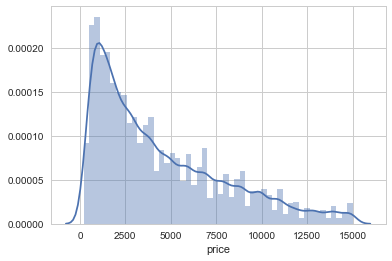

In [158]:
#Check the distribution of response variable - price
sns.distplot(df_auto_data.price)

In [159]:
#seperating predictor and response variables from dataset
Y = df_auto_data['price']
X = df_auto_data.drop(['price'], axis=1, inplace=False)

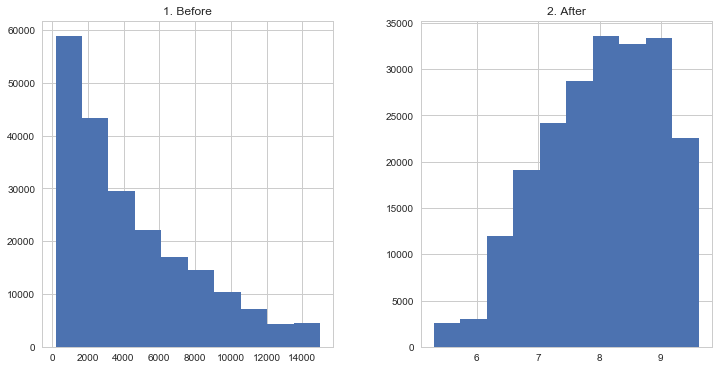

In [160]:
#Checking the Price Distribution and Normalizing the same using log
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

#taking log of price to distribute price data normally
Y_log = np.log1p(Y)

In [161]:
#Split the data into train and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y_log, test_size=0.3, random_state = 43)

### Linear Model

Let's see how linear model performs on data

In [162]:
#Applying Linear Regression Model on the train data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
#Checking linear model coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
vehicleType,-0.032717
yearOfRegistration,0.059224
gearbox,-0.014121
powerPS,0.008265
kilometer,-0.000008
monthOfRegistration,0.002041
fuelType,0.113170
brand,0.003199
notRepairedDamage,-0.653003
namelen,0.001752


In [164]:
#getting intercept
print(lm.intercept_)

-110.645354307


In [165]:
#predict price values of test data
predictions = lm.predict(X_test)

#### Evalutaion of model

Let's evaluate the performance of Linear model using MAE, MSE and RMSE.

In [166]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(predictions)))
print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(predictions)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions))))

MAE: 1608.50401189
MSE: 9068178.86387
RMSE: 3011.34170493


#### RMSE is 3011.34 which is not very good since price range is from 200 to 15,000 Euros. 

To validate the model, we need to perform cross-validation and see the mean RMSE scores.

### Cross validation

Here, we will perform 10-fold Cross Validation technique which will perform validation on the dataset by exposing each obersvation to testing and training sets at least once.

In [167]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

#performing 10-fold CV
scores = cross_val_score(lm, X, Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

#Print mean RMSE Score
print(rmse_scores.mean())

2286.37088965


#### RMSE score lowered to around 2287 Euros. This has increased the performance of model considerably.

### Random Forest Regressor

In [168]:
#Idea taken from https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value/notebook
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  # Used GridSearchCV to indentify the best parameters for the model

rf = RandomForestRegressor()

#We will be using Mean Square Error(MSE) for criterion
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [50]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=1, verbose=1) # Used K-Fold Cross Validation
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.6s finished


In [169]:
print(gs.best_score_)
print(gs.best_params_)

0.800993095447
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}


In [170]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_test, y_test))


Score: 0.81


In [171]:
predictions = forest.predict(X_test)

In [172]:
#Creating a Data frame to compare the Actual v/s predicted prices
df_results = pd.DataFrame({'Actual Price':np.exp(y_test), 'Predicted': np.exp(predictions) })
df_results.head()

,Actual Price,Predicted
15060,11501.0,11691.205447
55592,7801.0,7326.550183
311219,7600.0,8527.063246
297290,891.0,956.630462
29692,451.0,754.172430


In [173]:
#Determing RMS error
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(predictions)))
rms

1525.486809434791

 #### We were able to improve the RMS from over 3011.34 in Linear Regression to 1526 using RandomForest with GridSearch

#### Feature importance from Random Forest

1. yearOfRegistration (0.646721)
2. powerPS (0.203209)
3. notRepairedDamage (0.053937)
4. vehicleType (0.032559)
5. brand (0.030618)
6. kilometer (0.023807)
7. fuelType (0.004810)
8. namelen (0.002584)
9. monthOfRegistration (0.001308)
10. gearbox (0.000446)


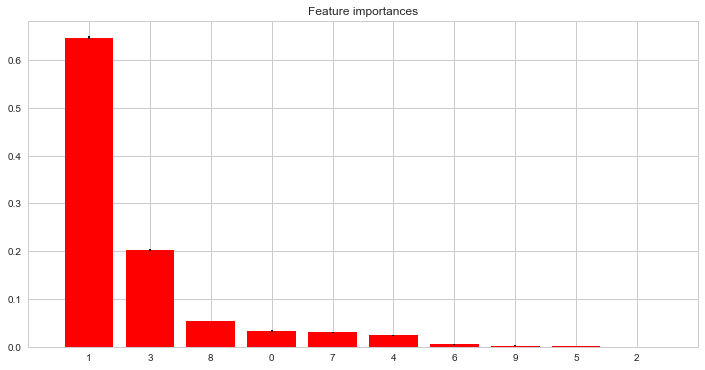

In [174]:
#Code in this cell has been referred from link https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value
#storing feature importances in a variable
feature_importances = forest.feature_importances_

#sorting importances
indices = np.argsort(feature_importances)[::-1]

#calculating standard deviation of feature importances
std = np.std([f.feature_importances_ for f in forest.estimators_],
             axis=0)  

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices[f]], feature_importances[indices[f]]))

# Plot the feature importances of the forest regressor
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Decison Tree Regressor

In [175]:
from sklearn.tree import DecisionTreeRegressor

In [176]:
#initialize Decision Tree regressor
dTree_reg = DecisionTreeRegressor(random_state=0)

In [177]:
#fit training data into regressor
dTree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [178]:
# Explained Varience Score
print('Score: %.2f' % forest.score(X_test, y_test))

Score: 0.81


In [179]:
#predict using decision tree regressor
predictions = dTree_reg.predict(X_test)

In [180]:
#Glimpse of actual and predicted values
df_results = pd.DataFrame({'Actual Price':np.exp(y_test), 'Predicted': np.exp(predictions) })
df_results.head(5)

,Actual Price,Predicted
15060,11501.0,9400.468127
55592,7801.0,8000.000000
311219,7600.0,5901.000000
297290,891.0,943.927963
29692,451.0,500.000000


In [181]:
#Finding out RMSE score after prediction
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(predictions)))
print(rmse)

1730.81462961


##### RandomForest with GridSearch performed a little better than Decision Tree

# Conclusion

#### Random Forest regressor with Grid Search came out to be the __best__ model for this dataset giving the lowest Root Mean Square Error amongst the 3 machine learning models.

<b>Most Important features:</b><br>
yearOfRegistration<br>
powerPS<br>
Brand<br>
<br>
<b>Nice to have:</b><br>
Actual selling price of the car<br>
Rating and reliability of seller!<br>

# Recommendations



1. People buying used cars should look for cars that have kilometer greater than 100 for getting a diverse set of options to buy from
2. If somebody want to buy limo and other luxury cars, but do not have enough money should go for old limos. They are cheap than SUVs
3. Customer can buy cars with 5000 kms as there is a drastic drop in price.
